In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [7]:
start = '2010-01-01'
end = '2019-12-31'

df=data.DataReader('AAPL','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.452591
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.553026
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.564354
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.459939
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.447997


In [8]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,70.027306
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.416679
2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.389565
2019-12-30,73.172501,71.305000,72.364998,72.879997,144114400.0,71.813278
2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,72.337975


In [9]:
df=df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.452591
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.553026
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.564354
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.459939
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.447997


In [10]:
df=df.drop(['Adj Close'],axis=1)
df.head()

,Date,High,Low,Open,Close,Volume
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0


In [11]:
df=df.drop(['Date'],axis=1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


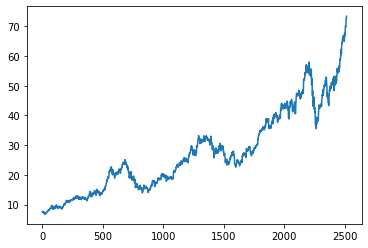

In [12]:
plt.plot(df.Close)

In [94]:
df

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0
...,...,...,...,...,...
2512,71.222504,70.730003,71.172501,71.067497,48478800.0
2513,72.495003,71.175003,71.205002,72.477501,93121200.0
2514,73.492500,72.029999,72.779999,72.449997,146266000.0
2515,73.172501,71.305000,72.364998,72.879997,144114400.0


In [13]:
# Calculating 100 day moving average
ma100=df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    59.401700
2513    59.643125
2514    59.875125
2515    60.106325
2516    60.331875
Name: Close, Length: 2517, dtype: float64

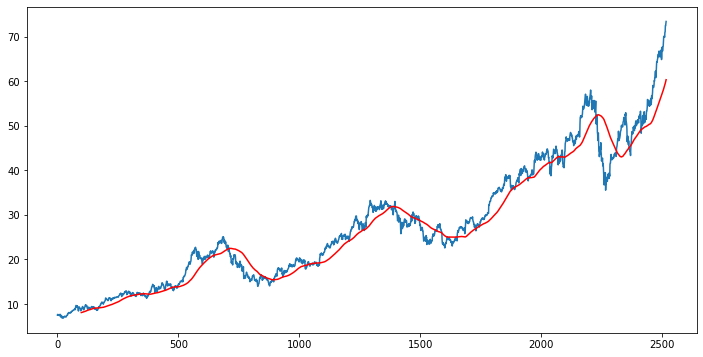

In [14]:
# ploting 100 day moving average
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [97]:
# Calculating 200 day moving average
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    54.261513
2513    54.396763
2514    54.529350
2515    54.661100
2516    54.793137
Name: Close, Length: 2517, dtype: float64

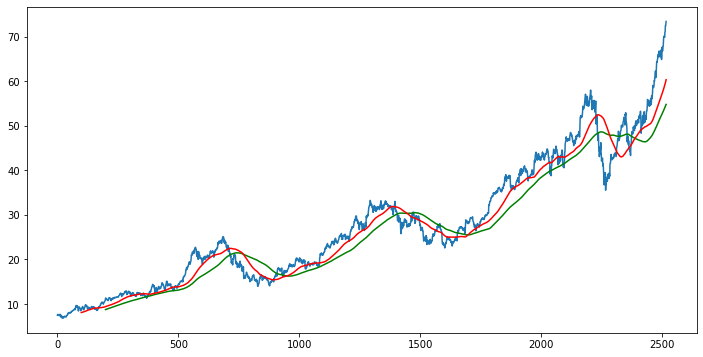

In [98]:
# ploting 100 day moving average
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma200,'g')
plt.plot(ma100,'r')

In [15]:
# to check no of rows and columns
df.shape

(2517, 5)

In [16]:
# Splitting data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1761, 1)
(756, 1)


In [17]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [18]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [19]:
# for stack LSTM method we have to scale down the training and testing data sets
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data_training_array=scaler.fit_transform(data_training)
# data_training_array

In [20]:
x_train=[]
y_train=[]


for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
# x_train
x_train,y_train=np.array(x_train),np.array(y_train)


x_train.shape

(1661, 100, 1)

In [21]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [160]:
model = Sequential()


model.add(LSTM(units=50, activation='relu', return_sequences = True,
               input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units=60, activation='relu', return_sequences = True ))
model.add(Dropout(0.3))


model.add(LSTM(units=80, activation='relu', return_sequences = True))
model.add(Dropout(0.4))


model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(units=1))

In [161]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_8 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_9 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_9 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_10 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_10 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_11 (LSTM)              (None, 120)              

In [162]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 [==============================] - 16s 236ms/step - loss: 0.0617
Epoch 2/50
52/52 [==============================] - 13s 240ms/step - loss: 0.0134
Epoch 3/50
52/52 [==============================] - 12s 221ms/step - loss: 0.0102
Epoch 4/50
52/52 [==============================] - 11s 208ms/step - loss: 0.0095
Epoch 5/50
52/52 [==============================] - 11s 220ms/step - loss: 0.0098
Epoch 6/50
52/52 [==============================] - 11s 215ms/step - loss: 0.0091
Epoch 7/50
52/52 [==============================] - 11s 214ms/step - loss: 0.0089
Epoch 8/50
52/52 [==============================] - 11s 210ms/step - loss: 0.0087
Epoch 9/50
52/52 [==============================] - 11s 209ms/step - loss: 0.0105
Epoch 10/50
52/52 [==============================] - 11s 215ms/step - loss: 0.0074
Epoch 11/50
52/52 [==============================] - 11s 212ms/step - loss: 0.00682s -
Epoch 12/50
52/52 [==============================] - 11s 209ms/step - loss: 0.0075
Epoch 13/

In [163]:
model.save('keras_mod.h5')

In [164]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [165]:
past_100_days = data_training.tail(100)

In [166]:
final_df=past_100_days.append(data_testing, ignore_index=True)

In [167]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [168]:
input_data=scaler.fit_transform(final_df)
# input_data

In [169]:
input_data.shape

(856, 1)

In [170]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [171]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


In [172]:
# prediction time
y_predicted = model.predict(x_test)


In [173]:
y_predicted.shape

(756, 1)

In [174]:
# x_test
# y_test

In [175]:
# y_predicted

In [176]:
scaler.scale_

array([0.02099517])

In [177]:
scale_factor=1/0.02099517
y_predicted = y_predicted * scale_factor
y_test=y_test*scale_factor

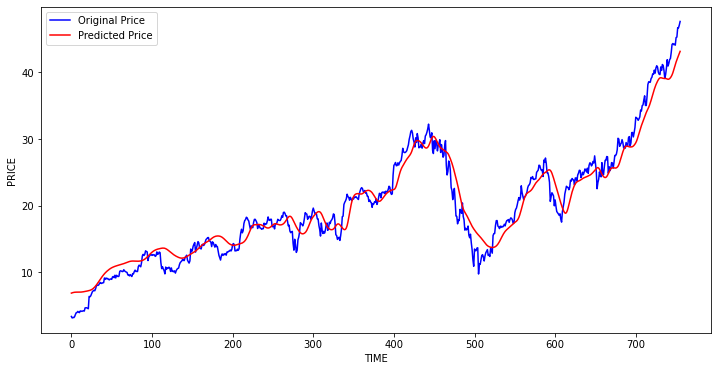

In [178]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('TIME')
plt.ylabel('PRICE')
plt.legend()
plt.show()
